# Lab Assignment 5

1. Start by having a look through the Module4/Datasets/ALOI/ directory. There are two directories filled with 192 x 144 pixel images. Identify their ordering and try to figure out what's changing between the images. They might not be perfectly ordered, but that doesn't matter to isomap.
2. Create a regular Python list object. Then, write a for-loop that iterates over the images in the Module4/Datasets/ALOI/32/ folder, appending each of them to your list. Each .PNG image should first be loaded into a temporary NDArray, just as shown in the Feature Representation reading.<br><br>*Optional: Resample your images down by a factor of two if you have a slower computer. You can also convert the image from  0-255  to  0.0-1.0  if you'd like, but that will have no effect on the algorithm's results.*<br><br>
3. Convert the list to a dataframe and run isomap on it to compute the lower dimensional embedding. Be sure to set n_components to 3 so you can visualize your manifold. You can also set the neighborhood size to six.
4. Plot the first two manifold components using a 2D scatter plot, then plot the first three components using a 3D scatter plot. Run your assignment and then answer the questions below.

In [102]:
# imports

import os
import numpy as np
import pandas as pd
import random, math

import matplotlib
import matplotlib.pyplot as plt

from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold

%matplotlib notebook

# Look pretty...
matplotlib.style.use('ggplot')

aloi_dir = r'C:\Users\ng35019\Documents\Training\python_for_ds\Module4\Isomap\Datasets\ALOI\32'

In [82]:
def Plot2D(T, title, x, y, num_to_plot=40):
  # This method picks a bunch of random samples (images in your case)
  # to plot onto the chart:
  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  for i in range(num_to_plot):
    img_num = int(random.random() * num_images)
    x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
    x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
    img = df.iloc[img_num,:].values.reshape(num_pixels[0], num_pixels[1])
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

In [80]:
# TODO: Start by creating a regular old, plain, "vanilla"
# python list. You can call it 'samples'.

samples = []

# 2. TODO: Write a for-loop that iterates over the images in the
# Module4/Datasets/ALOI/32/ folder, appending each of them to
# your list. Each .PNG image should first be loaded into a
# temporary NDArray, just as shown in the Feature
# Representation reading.
#

pngfiles = [f for f in os.listdir(aloi_dir) if f.endswith('.png')]
for pngfile in pngfiles:
    img = misc.imread(os.path.join(aloi_dir,pngfile))
    samples.append(img.reshape(img.shape[0]*img.shape[1]))   
num_pixels = img.shape
num_images = len(pngfiles)

In [107]:
# 3.Convert the list to a dataframe and run isomap on it to compute the lower dimensional embedding. 
# Be sure to set n_components to 3 so you can visualize your manifold. You can also set the neighborhood size to six.

from sklearn import manifold

df = pd.DataFrame(samples);

iso = manifold.Isomap(n_neighbors=4, n_components=3)
iso.fit(df)
manifold = iso.transform(df)

<IPython.core.display.Javascript object>


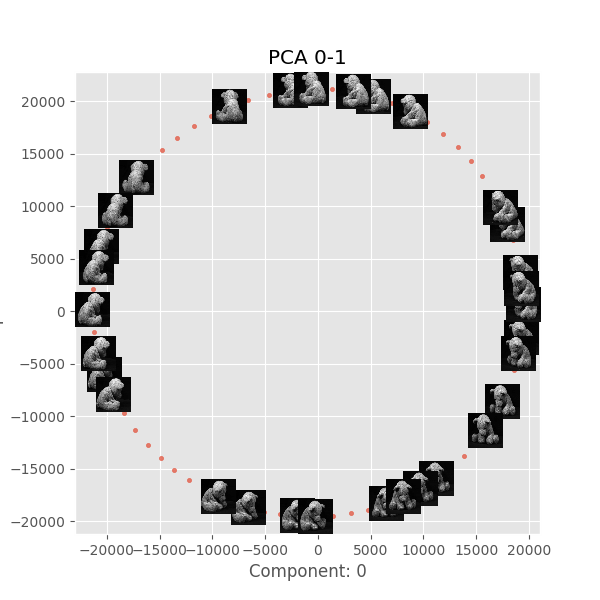

<IPython.core.display.Javascript object>


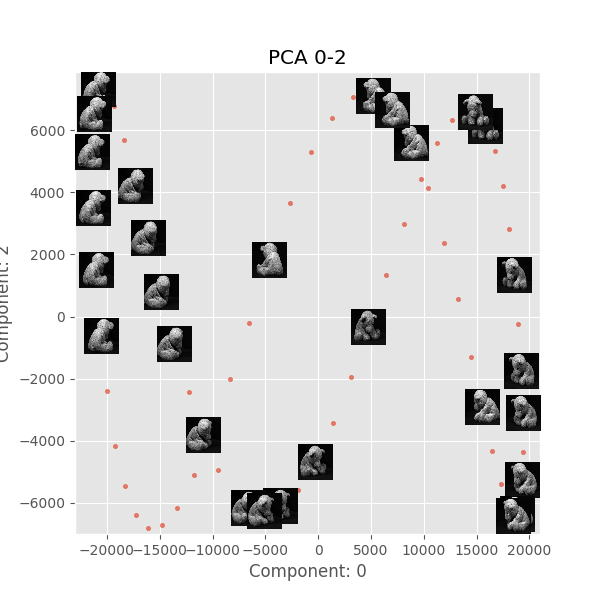

<IPython.core.display.Javascript object>


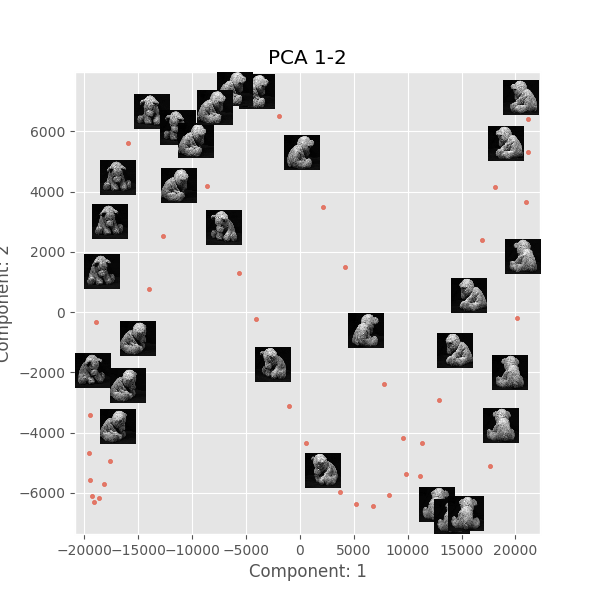

In [108]:
Plot2D(manifold, 'PCA 0-1', 0, 1, num_to_plot=40)
Plot2D(manifold, 'PCA 0-2', 0, 2, num_to_plot=40)
Plot2D(manifold, 'PCA 1-2', 1, 2, num_to_plot=40)

plt.show()

<IPython.core.display.Javascript object>


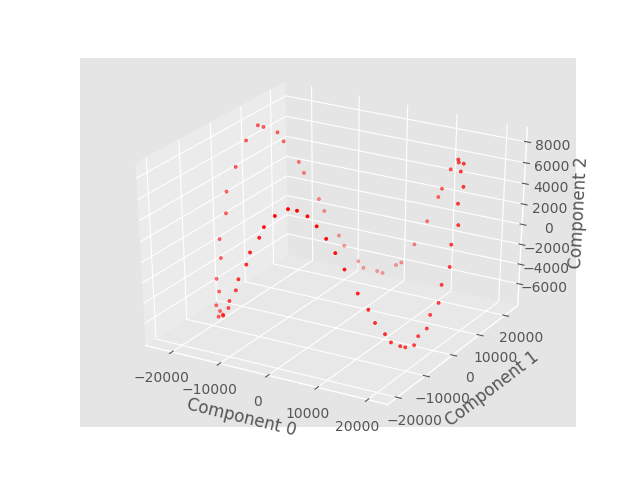

In [105]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')
ax.scatter(manifold[:,0],manifold[:,1], manifold[:,2], c='r', marker='.')

#ax.scatter(manifold[:,0], manifold[:,1], manifold[:,2], c='r', marker='.')

plt.show()

<IPython.core.display.Javascript object>


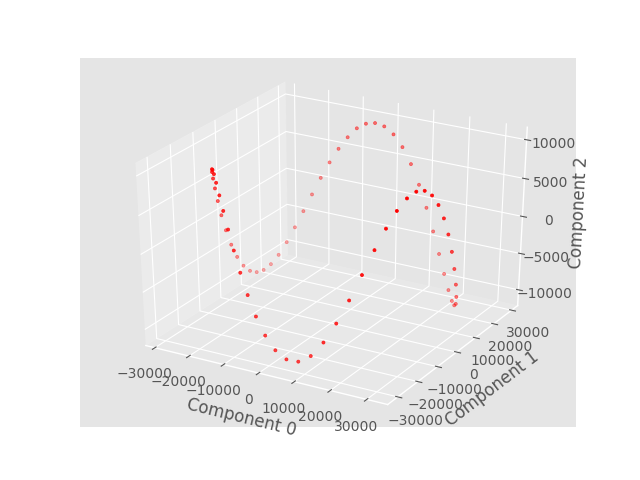

In [111]:
from sklearn import manifold

iso2 = manifold.Isomap(n_neighbors=2, n_components=3)
iso2.fit(df)
manifold = iso2.transform(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')
ax.scatter(manifold[:,0],manifold[:,1], manifold[:,2], c='r', marker='.')

plt.show()

In [115]:
# 1. Once you're done answering the first three questions, right before you converted your list to a dataframe, 
# add in additional code which also appends to your list the images in the Module4/Datasets/ALOI/32_i directory.

aloi_dir2 = r'C:\Users\ng35019\Documents\Training\python_for_ds\Module4\Isomap\Datasets\ALOI\32i'

# 2. Create a colors Python list. Store a 'b' in it for each element you load from the /32/ directory,
# and an 'r' for each element you load from the '32_i' directory. Then pass this variable to your 2D and 3D scatter plots, as an optional parameter c=colors. Re-run your assignment and answer the final question below.

samples = []
colors = []
pngfiles = [f for f in os.listdir(aloi_dir) if f.endswith('.png')]

for pngfile in pngfiles:
    img = misc.imread(os.path.join(aloi_dir,pngfile))
    samples.append(img.reshape(img.shape[0]*img.shape[1])) 
    colors.append('b')
    
pngfiles = [f for f in os.listdir(aloi_dir2) if f.endswith('.png')]
for pngfile in pngfiles:
    img = misc.imread(os.path.join(aloi_dir2,pngfile))
    samples.append(img.reshape(img.shape[0]*img.shape[1]))   
    colors.append('r')
    
num_pixels = img.shape
num_images = len(pngfiles)

In [118]:
from sklearn import manifold

df = pd.DataFrame(samples);

iso = manifold.Isomap(n_neighbors=6, n_components=3)
iso.fit(df)
manifold = iso.transform(df)

<IPython.core.display.Javascript object>


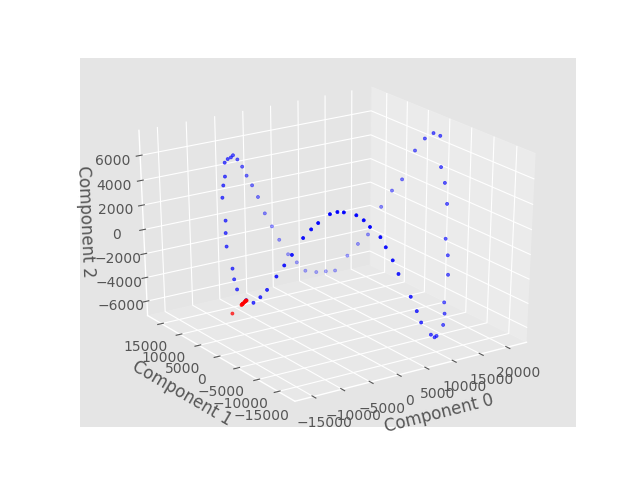

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 0')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 2')
ax.scatter(manifold[:,0],manifold[:,1], manifold[:,2], c=colors, marker='.')
plt.show()